In [1]:
%run rs2th_functions.ipynb

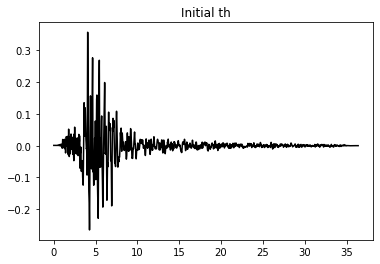

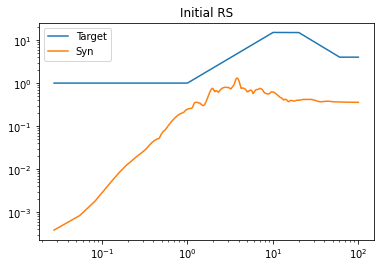

In [2]:
# Read th
dt = 0.005;
data = fileI('RSN125_FRIULI.A_A-TMZ000-1.AT2');
t,th = read_th(data,dt);
# Plot th
plt.figure(); plt.plot(t,th,'k-'); plt.title('Initial th');

# generate frequency table
freq,fmin,fmax,df = gen_ft(t);

# s-transform
fmin_samples = int(fmin/df); fmax_samples = int(fmax/df);
stock = st.st(th, fmin_samples, fmax_samples)
extent = (t[0], t[-1], fmin, fmax)

stock1 = np.copy(stock); # save original st

# RVCH 
ft = np.array([1,  10, 20, 60, 100.0]);  # frequency table
rt = np.array([1,  15, 15,  4, 4]);  # response spectrum table
rs = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));

freq,rs_syn = srs_iso(freq,th,0.05,dt);

plt.figure(); plt.loglog(freq,rs,label='Target'); plt.loglog(freq,rs_syn,label='Syn'); plt.title('Initial RS'); plt.legend();

In [3]:
# Interation
for k in range(50):
    inv_stock = st.ist(stock, fmin_samples, fmax_samples);
    inv_stock[np.where(inv_stock>rt[-1])] =rt[-1]
    inv_stock[np.where(inv_stock<-rt[-1])] =-rt[-1]
    freq,rs_syn = srs_iso(freq,inv_stock,0.05,dt);
    An = rs/rs_syn
    for i in range(len(stock[0,:])):
        stock[:,i] *= An;

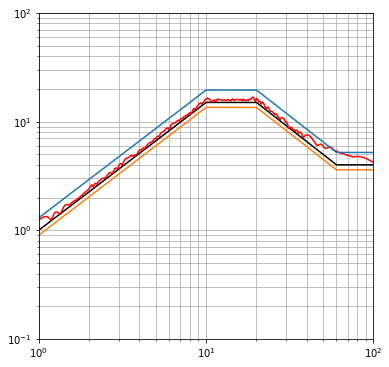

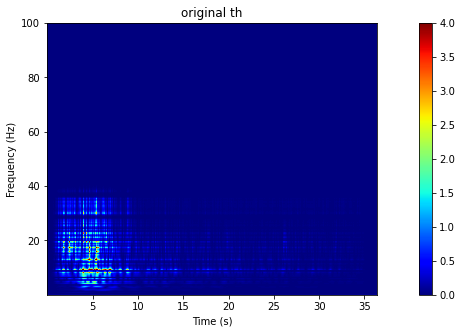

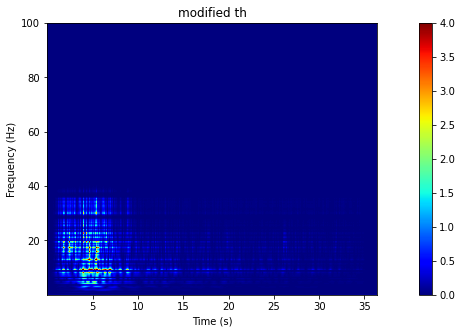

In [4]:
#  Plot RS
inv_stock *= 1.05; freq,rs_syn = srs_iso(freq,inv_stock,0.05,dt);
plt.figure(figsize=(6,6))
plt.loglog(freq,rs,'k-');
plt.loglog(freq,rs_syn,'r-');
plt.loglog(freq,rs*1.3);
plt.loglog(freq,rs*0.9);
plt.xlim(1,100); plt.grid(True, which="both", ls="-");
plt.ylim(0.1,100);

# plot s-transform
#plt.figure(figsize=(10.5,5));
#plt.plot(t, th,'k-',lw=0.4);
#plt.xlabel('Time (s)'); plt.ylabel('Acceleration (g)');
fig1 = plt.figure(figsize=(15,5));
a1 = plt.imshow(np.abs(stock), origin='lower', extent=extent, aspect=0.3,cmap='jet',vmin=0,vmax=4);
plt.xlabel('Time (s)'); plt.ylabel('Frequency (Hz)'); plt.title('original th');
fig1.colorbar(a1);
fig2 = plt.figure(figsize=(15,5));
a2 = plt.imshow(np.abs(stock), origin='lower', extent=extent, aspect=0.3,cmap='jet',vmin=0,vmax=4);
plt.xlabel('Time (s)'); plt.ylabel('Frequency (Hz)'); plt.title('modified th');
fig2.colorbar(a2);
plt.show()

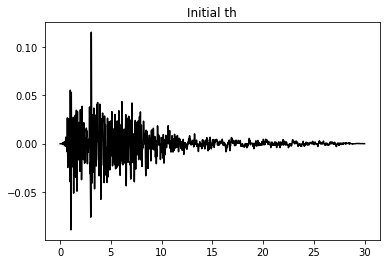

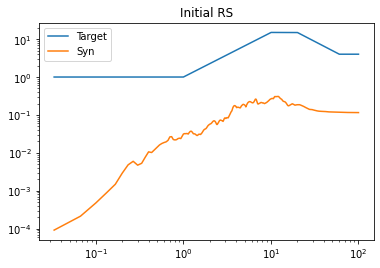

In [5]:
# Read th
dt = 0.005;
data = fileI('RSN454_MORGAN_GIL067-1.AT2');
t,th = read_th(data,dt);
# Plot th
plt.figure(); plt.plot(t,th,'k-'); plt.title('Initial th');

# generate frequency table
freq,fmin,fmax,df = gen_ft(t);

# s-transform
fmin_samples = int(fmin/df); fmax_samples = int(fmax/df);
stock = st.st(th, fmin_samples, fmax_samples)
extent = (t[0], t[-1], fmin, fmax)

stock1 = np.copy(stock); # save original st

# RVCH 
ft = np.array([1,  10, 20, 60, 100.0]);  # frequency table
rt = np.array([1,  15, 15,  4, 4]);  # response spectrum table
rs = 10**np.interp(np.log10(freq),np.log10(ft),np.log10(rt));

freq,rs_syn = srs_iso(freq,th,0.05,dt);

plt.figure(); plt.loglog(freq,rs,label='Target'); plt.loglog(freq,rs_syn,label='Syn'); plt.title('Initial RS'); plt.legend();

In [6]:
# Interation
for k in range(50):
    inv_stock = st.ist(stock, fmin_samples, fmax_samples);
    inv_stock[np.where(inv_stock>rt[-1])] =rt[-1]
    inv_stock[np.where(inv_stock<-rt[-1])] =-rt[-1]
    freq,rs_syn = srs_iso(freq,inv_stock,0.05,dt);
    An = rs/rs_syn
    for i in range(len(stock[0,:])):
        stock[:,i] *= An;

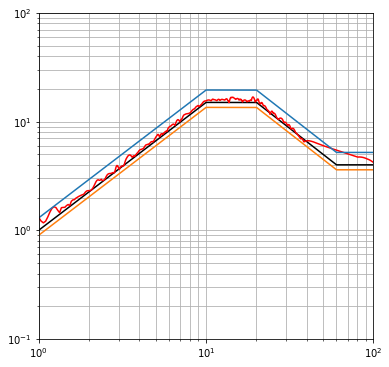

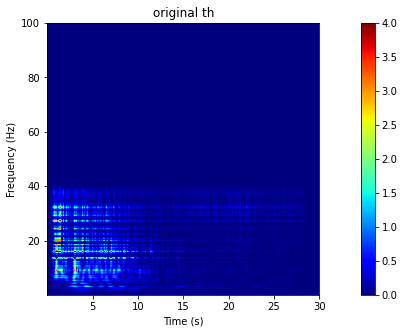

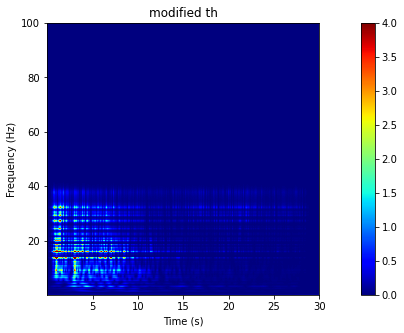

In [7]:
#  Plot RS
inv_stock *= 1.05; freq,rs_syn = srs_iso(freq,inv_stock,0.05,dt);
plt.figure(figsize=(6,6))
plt.loglog(freq,rs,'k-');
plt.loglog(freq,rs_syn,'r-');
plt.loglog(freq,rs*1.3);
plt.loglog(freq,rs*0.9);
plt.xlim(1,100); plt.grid(True, which="both", ls="-");
plt.ylim(0.1,100);

# plot s-transform
#plt.figure(figsize=(10.5,5));
#plt.plot(t, th,'k-',lw=0.4);
#plt.xlabel('Time (s)'); plt.ylabel('Acceleration (g)');
fig1 = plt.figure(figsize=(15,5));
a1 = plt.imshow(np.abs(stock), origin='lower', extent=extent, aspect=0.3,cmap='jet',vmin=0,vmax=4);
plt.xlabel('Time (s)'); plt.ylabel('Frequency (Hz)'); plt.title('original th');
fig1.colorbar(a1);
fig2 = plt.figure(figsize=(15,5));
a2 = plt.imshow(np.abs(stock), origin='lower', extent=extent, aspect=0.3,cmap='jet',vmin=0,vmax=4);
plt.xlabel('Time (s)'); plt.ylabel('Frequency (Hz)'); plt.title('modified th');
fig2.colorbar(a2);
plt.show()